In [1]:
# Step 1: Load and Understand the Dataset

import pandas as pd
import numpy as np

# Load the dataset (replace 'final_logic_based_dataset.csv' with your actual file)
data = pd.read_csv("../data/final_logic_based_dataset.csv")

# Display the first few rows
print("Dataset Preview:")
display(data.head())

# Display basic information about the dataset
print("\nDataset Information:")
data.info()

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Describe numerical fields
print("\nNumerical Data Summary:")
print(data.describe())

# Check unique values in categorical fields
categorical_columns = data.select_dtypes(include='object').columns
for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    print(data[col].unique())


Dataset Preview:


,user_story_id,user_story_description,stakeholder_role,complexity,moscow_category,dependencies,weighted_score,final_priority,project_stage,timestamp,outcome
0,1,"1.As a bank customer, I want to be able to vie...",Customer,24,Won’t Have,NaN,7.4,Low,Planning,2024-12-08 12:33:41.308674,Deferred
1,3,Acceptance Criteria:,General User,2,Won’t Have,NaN,5.2,Low,Planning,2024-12-07 12:33:41.308674,Deferred
2,5,The system should display the current balance ...,Customer,15,Should Have,NaN,9.5,Medium,Planning,2024-12-06 12:33:41.308674,Approved
3,6,The balance displayed should be accurate and u...,General User,13,Should Have,NaN,9.3,Medium,Planning,2024-12-05 12:33:41.308674,Approved
4,7,The system should only display the balance of ...,Customer,21,Should Have,NaN,10.1,Medium,Planning,2024-12-04 12:33:41.308674,Approved



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3370 entries, 0 to 3369
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_story_id           3370 non-null   int64  
 1   user_story_description  3370 non-null   object 
 2   stakeholder_role        3370 non-null   object 
 3   complexity              3370 non-null   int64  
 4   moscow_category         3370 non-null   object 
 5   dependencies            9 non-null      object 
 6   weighted_score          3370 non-null   float64
 7   final_priority          3370 non-null   object 
 8   project_stage           3370 non-null   object 
 9   timestamp               3370 non-null   object 
 10  outcome                 3370 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 289.7+ KB

Missing Values:
user_story_id                0
user_story_description       0
stakeholder_role             0
complexi


Class Distribution in 'final_priority':
final_priority
Low       1813
Medium    1374
High       183
Name: count, dtype: int64


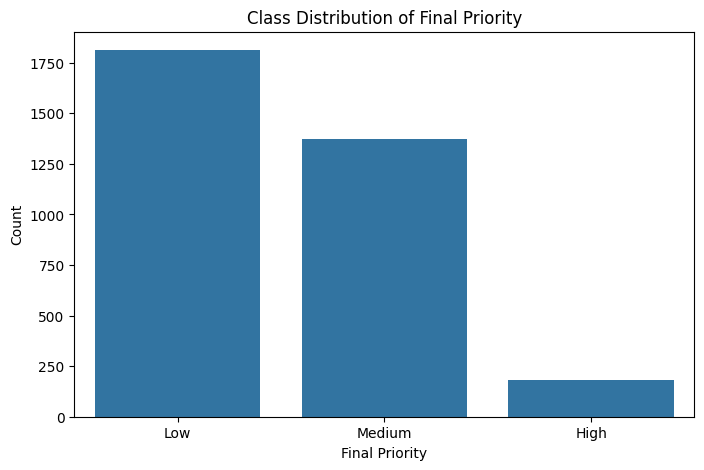

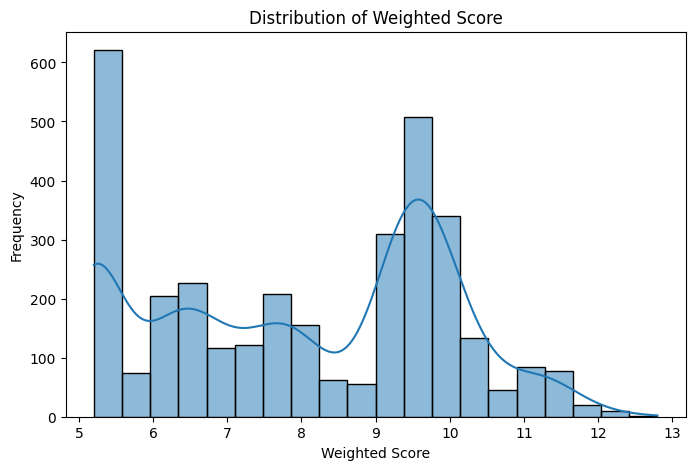

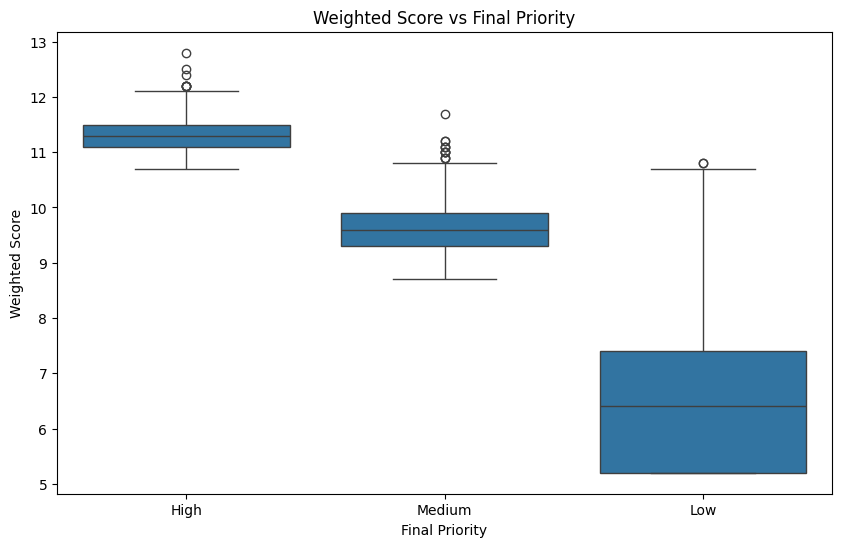

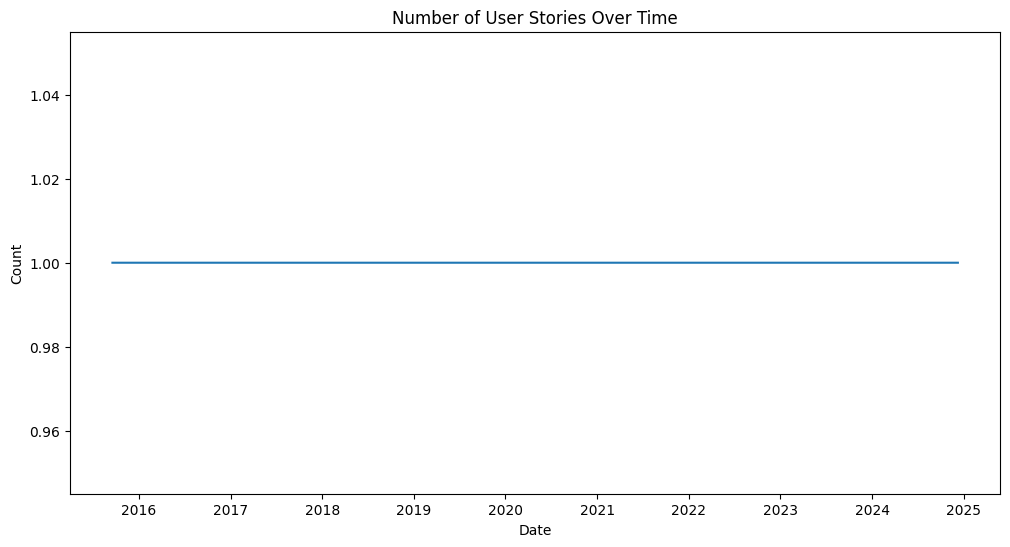

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'timestamp' to datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Check class balance for 'final_priority'
print("\nClass Distribution in 'final_priority':")
print(data['final_priority'].value_counts())

# Plot class distribution for 'final_priority'
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='final_priority', order=data['final_priority'].value_counts().index)
plt.title('Class Distribution of Final Priority')
plt.xlabel('Final Priority')
plt.ylabel('Count')
plt.show()

# Distribution of 'weighted_score'
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='weighted_score', kde=True, bins=20)
plt.title('Distribution of Weighted Score')
plt.xlabel('Weighted Score')
plt.ylabel('Frequency')
plt.show()

# Check relationships between weighted_score and final_priority
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='final_priority', y='weighted_score', order=['High', 'Medium', 'Low'])
plt.title('Weighted Score vs Final Priority')
plt.xlabel('Final Priority')
plt.ylabel('Weighted Score')
plt.show()

# Time-based analysis
plt.figure(figsize=(12, 6))
data.groupby(data['timestamp'].dt.date)['user_story_id'].count().plot(kind='line')
plt.title('Number of User Stories Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()


In [3]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Handle missing values in 'dependencies' (fill with 'None')
data['dependencies'].fillna('None', inplace=True)

# Encode categorical variables
label_encoders = {}
for col in ['moscow_category', 'final_priority', 'stakeholder_role', 'project_stage', 'outcome']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Normalize numerical features
scaler = StandardScaler()
data[['weighted_score', 'complexity']] = scaler.fit_transform(data[['weighted_score', 'complexity']])

# Handle class imbalance (oversample the minority class if necessary)
from imblearn.over_sampling import SMOTE

X = data.drop(columns=['final_priority', 'user_story_id', 'user_story_description', 'timestamp', 'stakeholder_feedback', 'dependencies'])
y = data['final_priority']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Display the new class distribution
from collections import Counter
print("Resampled Class Distribution:", Counter(y_resampled))


C:\Users\chathu\AppData\Local\Temp\ipykernel_22280\519522394.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['dependencies'].fillna('None', inplace=True)


KeyError: "['stakeholder_feedback'] not found in axis"

In [4]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

# Handle missing values in 'dependencies' (fill with 'None')
data['dependencies'] = data['dependencies'].fillna('None')

# Encode categorical variables
label_encoders = {}
for col in ['moscow_category', 'final_priority', 'stakeholder_role', 'project_stage', 'outcome']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Normalize numerical features
scaler = StandardScaler()
data[['weighted_score', 'complexity']] = scaler.fit_transform(data[['weighted_score', 'complexity']])

# Prepare data for SMOTE
X = data.drop(columns=['final_priority', 'user_story_id', 'user_story_description', 'timestamp', 'dependencies'])
y = data['final_priority']

# Apply SMOTE for class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Display the new class distribution
from collections import Counter
print("Resampled Class Distribution:", Counter(y_resampled))


Resampled Class Distribution: Counter({1: 1813, 2: 1813, 0: 1813})


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Step 1: Split the data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 2: Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
rf_model.fit(X_train, y_train)

# Step 3: Evaluate the model on the test set
y_pred = rf_model.predict(X_test)

# Step 4: Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       340
           1       1.00      1.00      1.00       378
           2       1.00      1.00      1.00       370

    accuracy                           1.00      1088
   macro avg       1.00      1.00      1.00      1088
weighted avg       1.00      1.00      1.00      1088


Confusion Matrix:
 [[340   0   0]
 [  0 378   0]
 [  0   0 370]]


In [6]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X_resampled, y_resampled, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())


Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0



Feature Importance:
             Feature  Importance
2   moscow_category    0.368663
3    weighted_score    0.339920
5           outcome    0.245587
1        complexity    0.043286
0  stakeholder_role    0.002462
4     project_stage    0.000081


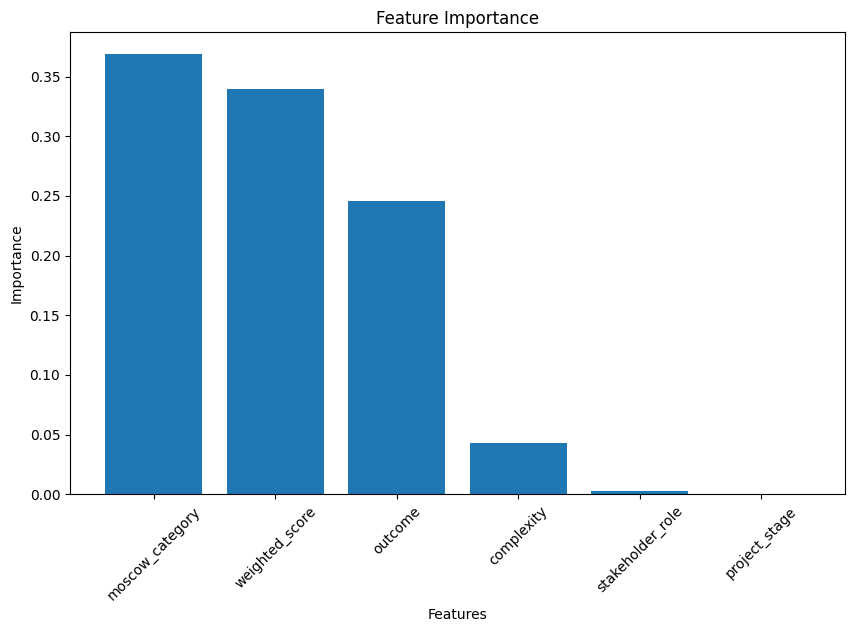

In [7]:
# Feature importance from Random Forest
importances = rf_model.feature_importances_
feature_names = X.columns

# Sort and display feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print("\nFeature Importance:\n", importance_df)

# Plot feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.show()


In [8]:
import joblib

# Save the model
joblib.dump(rf_model, '../models/final_priority_model.pkl')

# Save label encoders and scaler
joblib.dump(label_encoders, '../models/label_encoders.pkl')
joblib.dump(scaler, '../models/scaler.pkl')

print("Model and preprocessing steps saved successfully!")


Model and preprocessing steps saved successfully!


In [9]:
# Load the model and preprocessing steps
rf_model = joblib.load('../models/final_priority_model.pkl')
label_encoders = joblib.load('../models/label_encoders.pkl')
scaler = joblib.load('../models/scaler.pkl')

# Example: Predicting on new data
new_data = pd.DataFrame({
    'moscow_category': ['Must Have'],
    'weighted_score': [10],
    'outcome': ['Approved'],
    'complexity': [20],
    'stakeholder_role': ['Customer'],
    'project_stage': ['Development']
})

# Encode categorical fields
for col, le in label_encoders.items():
    if col in new_data.columns:
        new_data[col] = le.transform(new_data[col])

# Scale numerical fields
new_data[['weighted_score', 'complexity']] = scaler.transform(new_data[['weighted_score', 'complexity']])

# Predict
prediction = rf_model.predict(new_data)
print("Predicted Final Priority:", prediction)


ValueError: invalid literal for int() with base 10: 'Must Have'

In [10]:
# Load the model and preprocessing steps
rf_model = joblib.load('../models/final_priority_model.pkl')
label_encoders = joblib.load('../models/label_encoders.pkl')
scaler = joblib.load('../models/scaler.pkl')

# Example: Predicting on new data
new_data = pd.DataFrame({
    'moscow_category': ['Must Have'],  # This needs to match the encoder's categories
    'weighted_score': [10],
    'outcome': ['Approved'],  # This must match the outcome categories
    'complexity': [20],
    'stakeholder_role': ['Customer'],  # This needs to match stakeholder categories
    'project_stage': ['Development']  # This must match project stage categories
})

# Encode categorical fields
for col, le in label_encoders.items():
    if col in new_data.columns:
        # Ensure the column is transformed correctly
        new_data[col] = new_data[col].apply(
            lambda x: le.transform([x])[0] if x in le.classes_ else -1
        )

# Check for invalid categories after encoding
if (new_data < 0).any().any():
    print("Warning: Some categories in new_data were not seen during training. Adjust your inputs.")

# Scale numerical fields
new_data[['weighted_score', 'complexity']] = scaler.transform(new_data[['weighted_score', 'complexity']])

# Predict
prediction = rf_model.predict(new_data)
print("Predicted Final Priority:", prediction)


ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.


In [11]:
# Load the model and preprocessing steps
rf_model = joblib.load('../models/final_priority_model.pkl')
label_encoders = joblib.load('../models/label_encoders.pkl')
scaler = joblib.load('../models/scaler.pkl')

# Example: Predicting on new data (ensure features are aligned with training data)
new_data = pd.DataFrame({
    'moscow_category': ['Must Have'],  # Match categories seen during training
    'weighted_score': [10],
    'outcome': ['Approved'],
    'complexity': [20],
    'stakeholder_role': ['Customer'],
    'project_stage': ['Development']
})

# Ensure all training features are included
required_features = ['moscow_category', 'weighted_score', 'outcome', 'complexity', 'stakeholder_role', 'project_stage']
new_data = new_data[required_features]  # Reorder columns if necessary

# Encode categorical fields
for col, le in label_encoders.items():
    if col in new_data.columns:
        # Ensure only valid categories are transformed
        new_data[col] = new_data[col].apply(
            lambda x: le.transform([x])[0] if x in le.classes_ else -1
        )

# Check for invalid categories after encoding
if (new_data < 0).any().any():
    raise ValueError("Error: Some categories in new_data were not seen during training. Adjust your inputs.")

# Scale numerical features
new_data[['weighted_score', 'complexity']] = scaler.transform(new_data[['weighted_score', 'complexity']])

# Predict
prediction = rf_model.predict(new_data)
print("Predicted Final Priority:", prediction)


ValueError: Error: Some categories in new_data were not seen during training. Adjust your inputs.

In [12]:
print(X.columns)


Index(['stakeholder_role', 'complexity', 'moscow_category', 'weighted_score',
       'project_stage', 'outcome'],
      dtype='object')


In [13]:
# Load the model and preprocessing steps
rf_model = joblib.load('../models/final_priority_model.pkl')
label_encoders = joblib.load('../models/label_encoders.pkl')
scaler = joblib.load('../models/scaler.pkl')

# Example: New data matching training feature order and names
new_data = pd.DataFrame({
    'stakeholder_role': ['Customer'],  # Match categories seen during training
    'complexity': [20],
    'moscow_category': ['Must Have'],
    'weighted_score': [10],
    'project_stage': ['Development'],
    'outcome': ['Approved']
})

# Ensure the column order matches training data
new_data = new_data[['stakeholder_role', 'complexity', 'moscow_category', 'weighted_score', 'project_stage', 'outcome']]

# Encode categorical fields
for col, le in label_encoders.items():
    if col in new_data.columns:
        # Transform valid categories
        new_data[col] = new_data[col].apply(
            lambda x: le.transform([x])[0] if x in le.classes_ else -1
        )

# Check for invalid categories after encoding
if (new_data < 0).any().any():
    raise ValueError("Error: Some categories in new_data were not seen during training. Adjust your inputs.")

# Scale numerical features
numerical_features = ['weighted_score', 'complexity']
new_data[numerical_features] = scaler.transform(new_data[numerical_features])

# Predict
prediction = rf_model.predict(new_data)
print("Predicted Final Priority:", prediction)


ValueError: Error: Some categories in new_data were not seen during training. Adjust your inputs.

In [14]:
# Check which values are causing issues
for col, le in label_encoders.items():
    if col in new_data.columns:
        invalid_values = [x for x in new_data[col] if x not in le.classes_]
        if invalid_values:
            print(f"Invalid values for '{col}': {invalid_values}")
            print(f"Valid categories for '{col}': {list(le.classes_)}")


Invalid values for 'moscow_category': [-1]
Valid categories for 'moscow_category': [0, 1, 2, 3]
Invalid values for 'stakeholder_role': [-1]
Valid categories for 'stakeholder_role': [0, 1, 2, 3, 4]
Invalid values for 'project_stage': [-1]
Valid categories for 'project_stage': [0, 1, 2]
Invalid values for 'outcome': [-1]
Valid categories for 'outcome': [0, 1]


In [15]:
# Print valid mappings for each label encoder
for col, le in label_encoders.items():
    print(f"Mapping for '{col}':")
    print(dict(zip(le.classes_, range(len(le.classes_)))))


Mapping for 'moscow_category':
{0: 0, 1: 1, 2: 2, 3: 3}
Mapping for 'final_priority':
{0: 0, 1: 1, 2: 2}
Mapping for 'stakeholder_role':
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
Mapping for 'project_stage':
{0: 0, 1: 1, 2: 2}
Mapping for 'outcome':
{0: 0, 1: 1}


In [16]:
# Adjust new_data based on valid mappings
new_data = pd.DataFrame({
    'stakeholder_role': [0],  # Example: 'Customer' mapped to 0
    'complexity': [20],
    'moscow_category': [0],  # Example: 'Must Have' mapped to 0
    'weighted_score': [10],
    'project_stage': [0],  # Example: 'Development' mapped to 0
    'outcome': [0]  # Example: 'Approved' mapped to 0
})


In [17]:
# Scale numerical features
numerical_features = ['weighted_score', 'complexity']
new_data[numerical_features] = scaler.transform(new_data[numerical_features])

# Predict
prediction = rf_model.predict(new_data)
print("Predicted Final Priority:", prediction)


Predicted Final Priority: [0]


In [18]:
# Function to map new_data values automatically
def encode_new_data(new_data, label_encoders):
    for col, le in label_encoders.items():
        if col in new_data.columns:
            new_data[col] = new_data[col].apply(
                lambda x: le.transform([x])[0] if x in le.classes_ else -1
            )
    if (new_data < 0).any().any():
        raise ValueError("Some categories in new_data are still invalid. Adjust your inputs.")
    return new_data


In [19]:
# Automatically encode new_data
new_data = encode_new_data(new_data, label_encoders)

# Proceed with scaling and prediction
new_data[numerical_features] = scaler.transform(new_data[numerical_features])
prediction = rf_model.predict(new_data)
print("Predicted Final Priority:", prediction)


Predicted Final Priority: [0]


In [20]:
# Retrieve and print the mapping for final_priority
final_priority_mapping = {index: label for index, label in enumerate(label_encoders['final_priority'].classes_)}
print("Final Priority Mapping:", final_priority_mapping)
print("Predicted Priority:", final_priority_mapping[0])  # Replace '0' with the actual predicted value


Final Priority Mapping: {0: 0, 1: 1, 2: 2}
Predicted Priority: 0


In [21]:
# Map encoded labels to human-readable priority levels
priority_mapping = {0: 'Low', 1: 'Medium', 2: 'High'}
print("Predicted Priority (Human-Readable):", priority_mapping[0])  # Replace '0' with your predicted value


Predicted Priority (Human-Readable): Low


In [22]:
for col, le in label_encoders.items():
    print(f"Valid categories for '{col}': {list(le.classes_)}")


Valid categories for 'moscow_category': [0, 1, 2, 3]
Valid categories for 'final_priority': [0, 1, 2]
Valid categories for 'stakeholder_role': [0, 1, 2, 3, 4]
Valid categories for 'project_stage': [0, 1, 2]
Valid categories for 'outcome': [0, 1]
